### Exercise

Use PCA to visualise the `wine` dataset. 

In [2]:
from sklearn.datasets import load_wine
wine = load_wine()


In [3]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [4]:
from sklearn.preprocessing import StandardScaler

# make a new Scaler object
scaler = StandardScaler()

# calling fit and transform
scaler.fit(wine.data)
X_scaled = scaler.transform(wine.data)


In [5]:
from sklearn.decomposition import PCA

# keep the first two principal components of the data
pca = PCA(n_components=2)

# fit PCA model 
pca.fit(X_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (178, 13)
Reduced shape: (178, 2)


In [6]:
# the target has three possible values
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

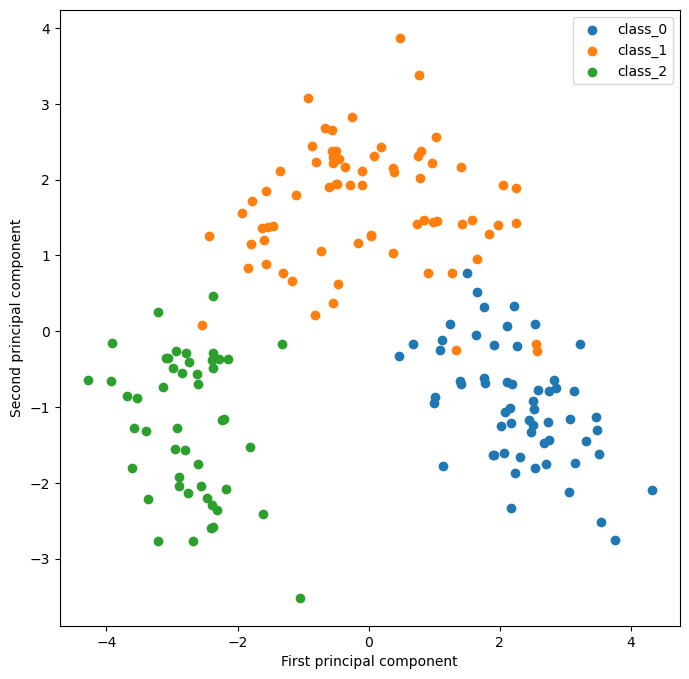

In [7]:
import matplotlib.pyplot as plt

# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
plt.scatter(X_pca[wine.target==0, 0], X_pca[wine.target==0, 1], label=wine.target_names[0])
plt.scatter(X_pca[wine.target==1, 0], X_pca[wine.target==1, 1], label=wine.target_names[1])
plt.scatter(X_pca[wine.target==2, 0], X_pca[wine.target==2, 1], label=wine.target_names[2])

plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.legend()
plt.show()

How does standardisation of the data affect the PCA result?

In [8]:
# repeating the workflow without scaling:

pca2 = PCA(n_components=2)

# fit PCA model 
pca2.fit(wine.data)

# transform data onto the first two principal components
X_pca2 = pca2.transform(wine.data)
print("Original shape: {}".format(str(wine.data.shape)))
print("Reduced shape: {}".format(str(X_pca2.shape)))

Original shape: (178, 13)
Reduced shape: (178, 2)


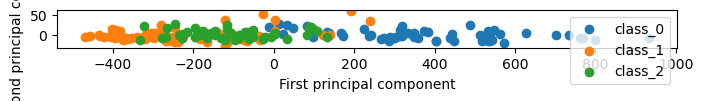

In [9]:

# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
plt.scatter(X_pca2[wine.target==0, 0], X_pca2[wine.target==0, 1], label=wine.target_names[0])
plt.scatter(X_pca2[wine.target==1, 0], X_pca2[wine.target==1, 1], label=wine.target_names[1])
plt.scatter(X_pca2[wine.target==2, 0], X_pca2[wine.target==2, 1], label=wine.target_names[2])
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.legend()
plt.show()

In [ ]:
# clearly standardisation is critical
# to get good PCA results for this dataset

Compare your PCA result with a t-SNE visualisation.

In [10]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=1)
# use fit_transform instead of fit, as TSNE has no transform method
wine_tsne = tsne.fit_transform(X_scaled)

Text(0, 0.5, 't-SNE feature 1')

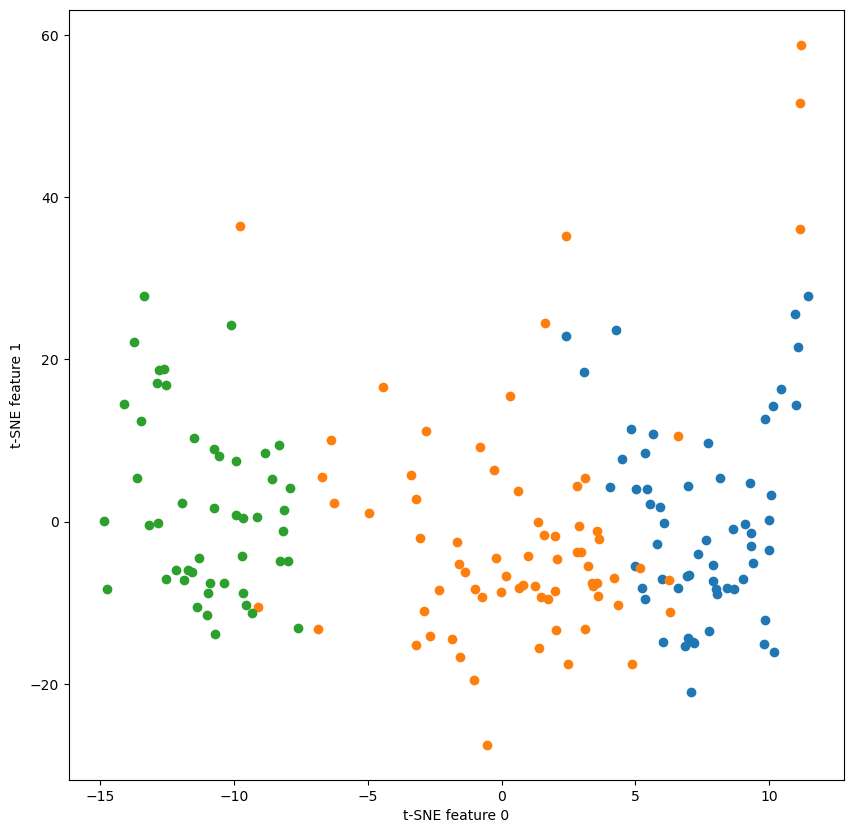

In [11]:
plt.figure(figsize=(10, 10))
plt.scatter(wine_tsne[wine.target==0, 0], X_pca2[wine.target==0, 1], label=wine.target_names[0])
plt.scatter(wine_tsne[wine.target==1, 0], X_pca2[wine.target==1, 1], label=wine.target_names[1])
plt.scatter(wine_tsne[wine.target==2, 0], X_pca2[wine.target==2, 1], label=wine.target_names[2])

plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")

In [ ]:
# Note that t-SNE is also quite sensitive 
# to standardisation.
